In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
torch.cuda.current_device()

0

In [3]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [4]:
def get_default_device():
    """Picking GPU if available or else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()
device

device(type='cuda')

In [5]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms

normalize = transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                 std=[x / 255.0 for x in [63.0, 62.1, 66.7]])

cf10_transforms = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

cifar_10 = CIFAR10('.', train=True, download=True, transform=cf10_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [6]:
len(cifar_10)

50000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


LABEL: 1


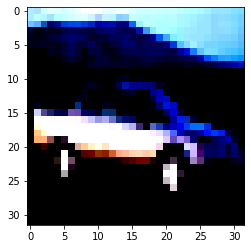

In [ ]:
from matplotlib import pyplot as plt

#image, label = next(iter(cifar_10))
image, label =cifar_10[4]
print(f"LABEL: {label}")
plt_img = image.numpy().transpose(1, 2, 0)
plt.imshow(plt_img);

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(cifar_10, batch_size=32, shuffle=True)

In [ ]:
len(train_loader)

1563

In [ ]:
for batch in train_loader:
    x, y = batch
    print(x.shape, y.shape)
    break

torch.Size([32, 3, 32, 32]) torch.Size([32])


In [ ]:
from torchvision import models

resnet50 = models.resnet50(pretrained=True)

for param in resnet50.parameters():
    param.requires_grad = False

num_classes = 10
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, num_classes)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
x, y = next(iter(train_loader))

preds = resnet50(x)
preds[:5]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[ 0.5705,  0.3029, -0.3451,  0.0713,  0.0280, -0.1278,  0.3803, -0.1769,
         -0.0166,  0.0382],
        [ 1.5479,  0.8505, -0.1527, -0.6228, -0.2568, -1.1010,  0.6413,  0.5723,
         -0.4158,  0.5360],
        [ 0.5121,  0.2258,  0.0737,  0.3576, -0.2623, -0.4381,  0.6242, -0.1174,
         -0.2075, -0.3603],
        [ 0.8367,  1.2949, -0.6271,  0.5682,  0.3105, -0.4943,  0.4352,  0.1796,
         -0.5918,  0.4199],
        [ 0.7522,  0.2329,  0.1574, -0.0027,  0.0825, -0.3972,  0.3681,  0.6360,
          0.1300, -0.1830]], grad_fn=<SliceBackward>)

In [ ]:
from torch.nn.functional import softmax

preds = softmax(preds, dim=-1)
preds[:5]

tensor([[0.1589, 0.1216, 0.0636, 0.0964, 0.0923, 0.0790, 0.1313, 0.0752, 0.0883,
         0.0933],
        [0.3017, 0.1502, 0.0551, 0.0344, 0.0496, 0.0213, 0.1219, 0.1137, 0.0423,
         0.1097],
        [0.1502, 0.1128, 0.0969, 0.1287, 0.0692, 0.0581, 0.1680, 0.0800, 0.0732,
         0.0628],
        [0.1534, 0.2426, 0.0355, 0.1173, 0.0906, 0.0405, 0.1027, 0.0795, 0.0368,
         0.1011],
        [0.1682, 0.1001, 0.0928, 0.0791, 0.0861, 0.0533, 0.1145, 0.1497, 0.0903,
         0.0660]], grad_fn=<SliceBackward>)

In [ ]:
pred_labels = torch.argmax(preds, dim=-1)
pred_labels[:5]

tensor([0, 0, 6, 1, 0])

In [ ]:
y[:5]

tensor([0, 3, 8, 1, 0])

In [ ]:
from torch.nn.functional import cross_entropy
from torch.optim import Adam

optimizer = Adam(resnet50.fc.parameters(), lr=1e-3)

running_loss = 0.0
epochs = 10
for epoch in range(epochs):
    for batch in train_loader:
        x, y = batch
        preds = resnet50(x)
        loss = cross_entropy(preds, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(loss.item())
        running_loss += loss.item()
    print('[%d, %5d] loss: %.3f' %(epoch, running_loss/len(cifar_10)))
    running_loss = 0.0



2.4792346954345703
2.3587770462036133
2.77716064453125
2.5662310123443604
2.65400767326355
2.351490020751953
2.3495819568634033
2.325549602508545
2.240671157836914
2.2388579845428467
2.47623872756958
2.493884563446045
2.3714091777801514
2.3324432373046875
2.42976975440979
2.2016658782958984
2.462742567062378
2.2068207263946533
2.2577414512634277
2.221022605895996
2.284414052963257
2.189744472503662
2.2619950771331787
2.03442645072937
2.083287477493286
2.2919464111328125
2.065356969833374
1.9255414009094238
2.1548244953155518
2.0022339820861816
2.049154043197632
2.060110569000244
2.080238103866577
2.2273004055023193
2.2585082054138184
2.1130030155181885
1.9782804250717163
1.7362873554229736
1.9620685577392578
2.0793819427490234
2.058466911315918
1.9650431871414185
2.018961191177368
1.9591710567474365
1.9571024179458618
1.8128517866134644
1.9948266744613647
1.974555253982544
2.0492970943450928
1.845234990119934
2.1542723178863525
1.8756110668182373
1.6995874643325806
1.7046022415161133
1

KeyboardInterrupt: ignored